In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing Dataset


In [4]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Exploratory Analysis & Data Visualizations


Skewed Classes

Text(0.5, 8.95999999999998, 'wine quality')

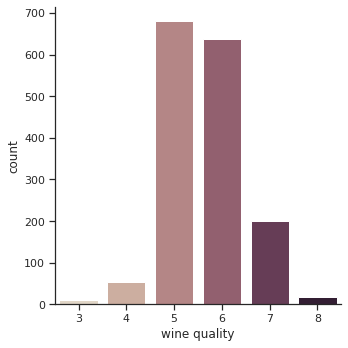

In [7]:
# Visualize the categorical labels first
sns.set(style="ticks", color_codes=True)

sns.catplot(x="quality", kind="count", palette="ch:.25", data=wine_df);
plt.xlabel('wine quality')

In [8]:
wine_df['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Correlation Analysis

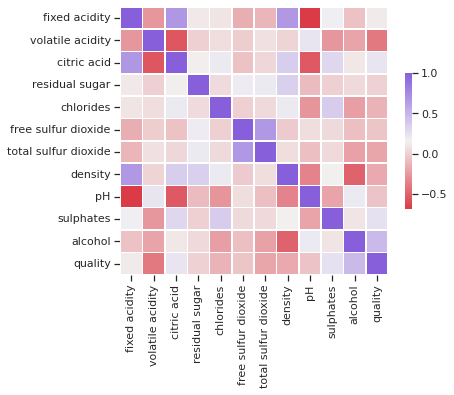

In [9]:
corr = wine_df.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(6, 5))
cmap = sns.diverging_palette(10, 275, as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

Plotting Features w.r.t. Labels (Wine Quality)

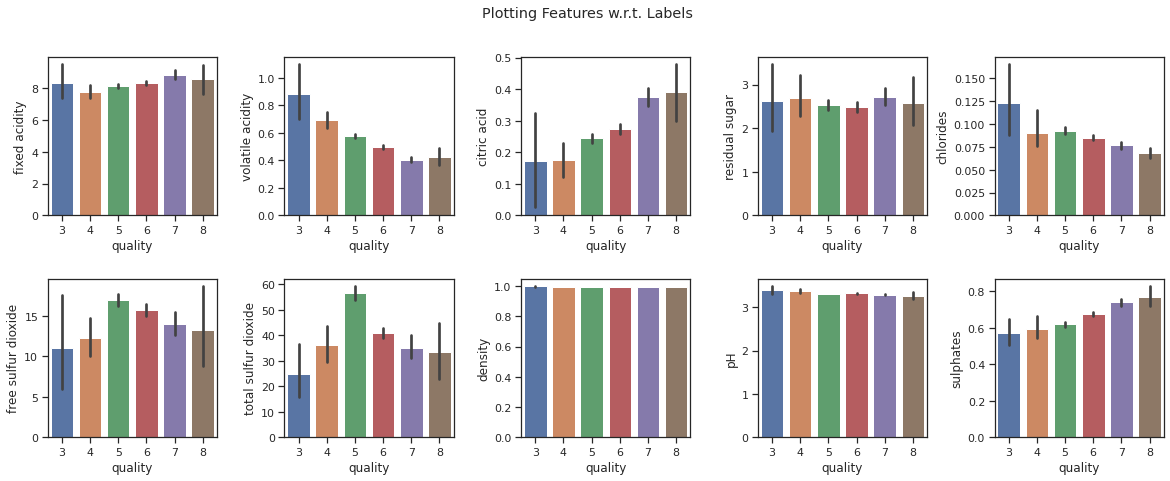

In [10]:
# Creating a 2 x 5 subplot grid
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,7))
figure.suptitle("Plotting Features w.r.t. Labels")
# wspace: the amount of width reserved for space between subplots, expressed as a fraction of the average axis width
# hspace; the amount of height reserved for space between subplots, expressed as a fraction of the average axis height
figure.subplots_adjust(hspace=0.4, wspace= 0.4)

# Using for loop to interate through different features and plot its barplot against wine "quality" feature (categorical data)
for i in range(2):
  for j in range(5):
    sns.barplot(ax=axes[i,j], x='quality', y=wine_df.columns[i*5 + j], data = wine_df)

Data Preprocessing

In [11]:
X = wine_df.iloc[:, :-1]
y = wine_df.iloc[:, -1]
print("the dimension of X training examples is:" + str(X.shape) + "\nthe dimension of y training examples is:" + str(y.shape))
# map wine quality from [3,8] to [0, 6]
y = y - 3

the dimension of X training examples is:(1599, 11)
the dimension of y training examples is:(1599,)


In [12]:
# wine_df = wine_df.drop(labels=['density','sulphates', 'residual sugar', 'chlorides', 'pH'], axis=1)
# wine_df.head()

In [13]:
y.head()

0    2
1    2
2    2
3    3
4    2
Name: quality, dtype: int64

In [16]:
import pandas as pd
import numpy as np
!pip install modAL
from modAL.models import ActiveLearner
from modAL.models import Committee
from modAL.disagreement import vote_entropy_sampling
from modAL import uncertainty
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

In [17]:
from sklearn.model_selection import train_test_split
labelled_data, unlabelled_data,label, oracle_ans = train_test_split(X,y, test_size = 0.9, random_state = 2)

In [18]:
labelled_data = labelled_data.to_numpy()
label = label.to_numpy()

In [19]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.uncertainty_sampling, X_training = labelled_data, y_training = label)

In [67]:
pool1,temp1,orac1,buf1 = train_test_split(unlabelled_data, oracle_ans, test_size = 0.9, random_state=2)
pool2,temp2,orac2,buf2 = train_test_split(temp1, buf1, test_size = 0.77, random_state=2)
pool3,pool4,orac3,orac4 = train_test_split(temp2, buf2, test_size = 0.56, random_state=2)

In [68]:
pool1 = pool1.to_numpy()
orac1 = orac1.to_numpy()
pool2 = pool2.to_numpy()
orac2 = orac2.to_numpy()
pool3 = pool3.to_numpy()
orac3 = orac3.to_numpy()
pool4 = pool4.to_numpy()
orac4 = orac4.to_numpy()

In [45]:
queries = 120
for i in range(queries):
  query_idx, val = learner.query(pool1)
  learner.teach(
      X = pool1[query_idx].reshape(1,-1),
      y = orac1[query_idx].reshape(1,)
  )
  pool1 = np.delete(pool1, query_idx, axis = 0)
  orac1 = np.delete(orac1, query_idx)
  # look up for score
  acc_10.append(learner.score(X.to_numpy(),y.to_numpy()))

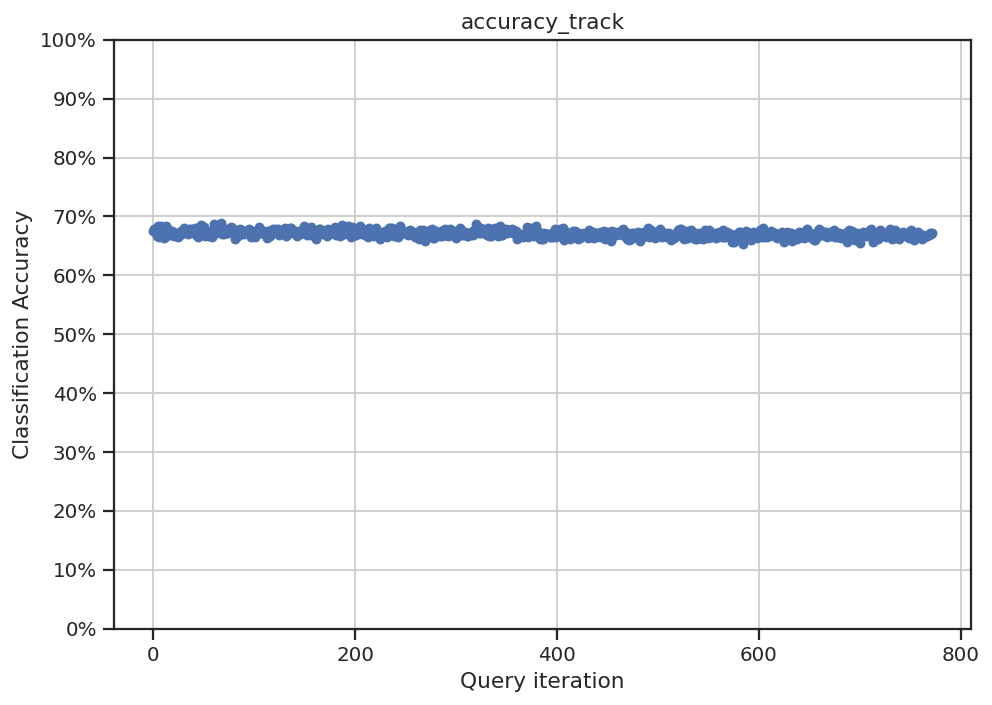

In [47]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_10)
ax.scatter(range(len(acc_10)), acc_10, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [48]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.uncertainty_sampling, X_training = labelled_data, y_training = label)

In [50]:
queries = 220
acc_20 = []
for i in range(queries):
  query_idx, val = learner.query(pool2)
  learner.teach(
      X = pool2[query_idx].reshape(1,-1),
      y = orac2[query_idx].reshape(1,)
  )
  pool2 = np.delete(pool2, query_idx, axis = 0)
  orac2 = np.delete(orac2, query_idx)
  # look up for score
  acc_20.append(learner.score(X.to_numpy(),y.to_numpy()))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:861: RuntimeWarning: invalid value encountered in true_divide
  proba /= len(self.estimators_)


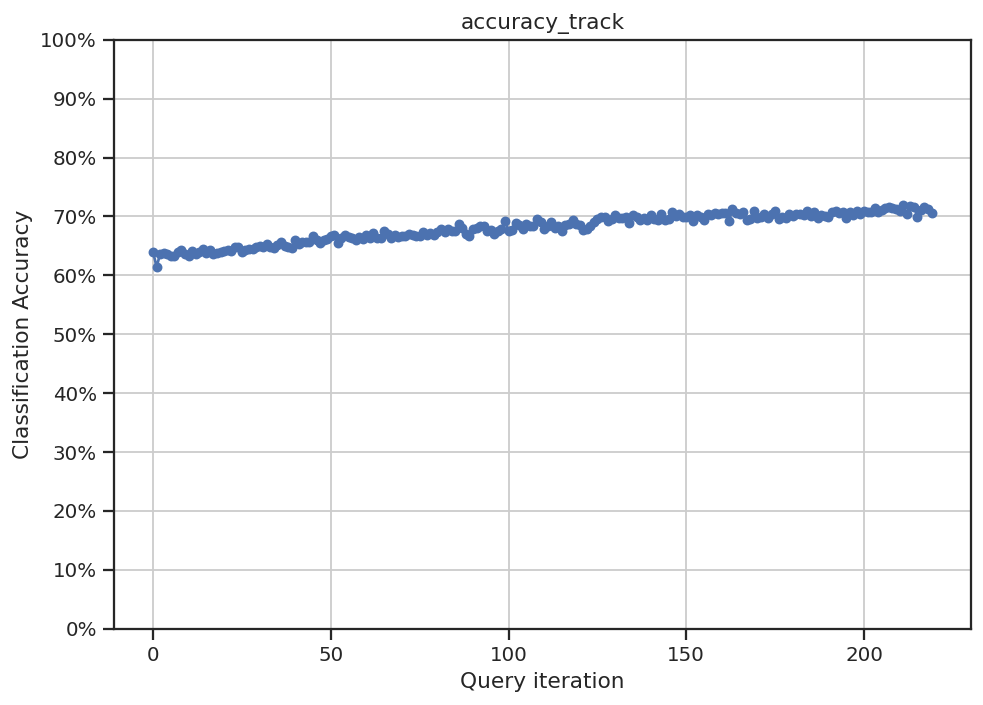

In [51]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_20)
ax.scatter(range(len(acc_20)), acc_20, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [55]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.uncertainty_sampling, X_training = labelled_data, y_training = label)

In [60]:
queries = 350
acc_30 = []
for i in range(queries):
  query_idx, val = learner.query(pool3)
  learner.teach(
      X = pool3[query_idx].reshape(1,-1),
      y = orac3[query_idx].reshape(1,)
  )
  pool3 = np.delete(pool3, query_idx, axis = 0)
  orac3 = np.delete(orac3, query_idx)
  # look up for score
  acc_30.append(learner.score(X.to_numpy(),y.to_numpy()))

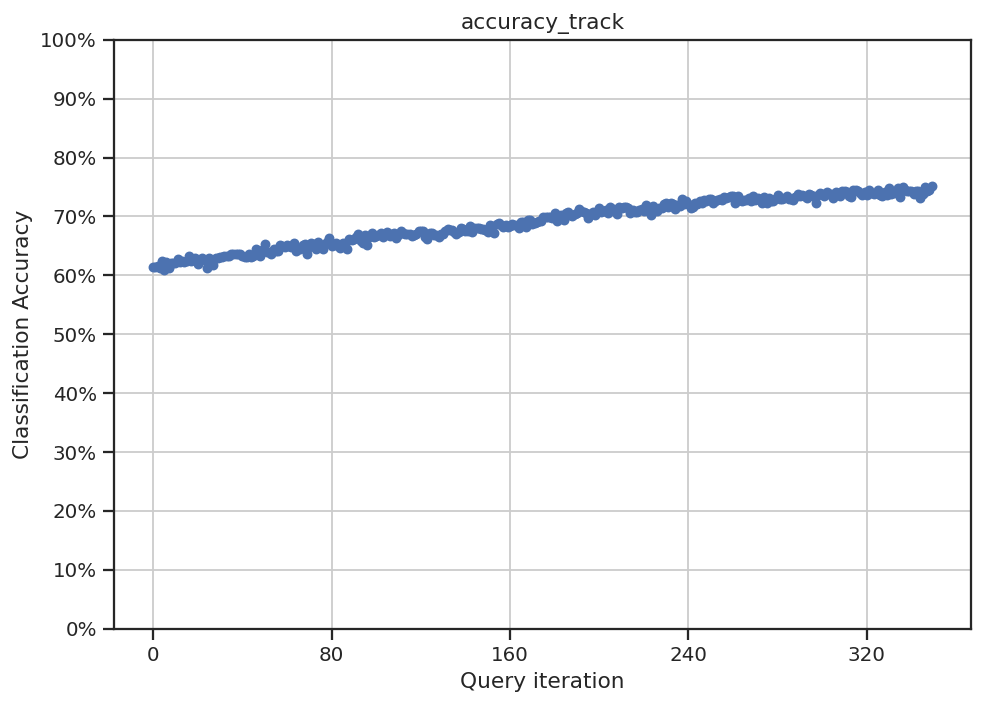

In [61]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_30)
ax.scatter(range(len(acc_30)), acc_30, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [65]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.uncertainty_sampling, X_training = labelled_data, y_training = label)

In [69]:
queries = 500
acc_40 = []
for i in range(queries):
  query_idx, val = learner.query(pool4)
  learner.teach(
      X = pool4[query_idx].reshape(1,-1),
      y = orac4[query_idx].reshape(1,)
  )
  pool4 = np.delete(pool4, query_idx, axis = 0)
  orac4 = np.delete(orac4, query_idx)
  # look up for score
  acc_40.append(learner.score(X.to_numpy(),y.to_numpy()))

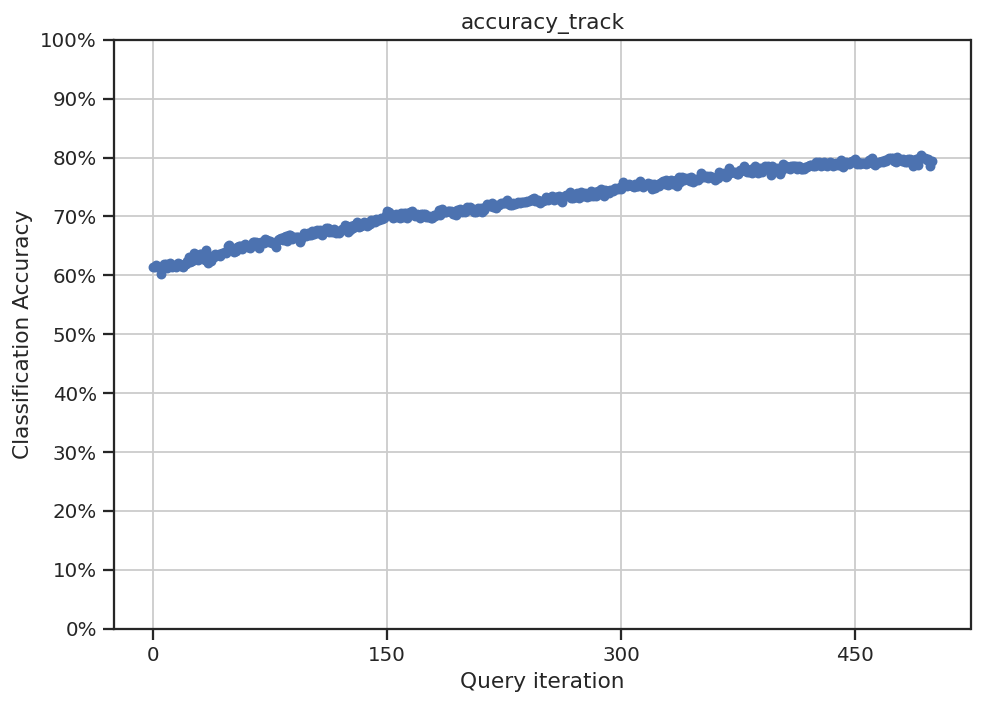

In [70]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_40)
ax.scatter(range(len(acc_40)), acc_40, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [77]:
earner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.margin_sampling, X_training = labelled_data, y_training = label)

In [93]:
pool1,temp1,orac1,buf1 = train_test_split(unlabelled_data, oracle_ans, test_size = 0.9, random_state=2)
pool2,temp2,orac2,buf2 = train_test_split(temp1, buf1, test_size = 0.77, random_state=2)
pool3,pool4,orac3,orac4 = train_test_split(temp2, buf2, test_size = 0.56, random_state=2)

In [94]:
pool1 = pool1.to_numpy()
orac1 = orac1.to_numpy()
pool2 = pool2.to_numpy()
orac2 = orac2.to_numpy()
pool3 = pool3.to_numpy()
orac3 = orac3.to_numpy()
pool4 = pool4.to_numpy()
orac4 = orac4.to_numpy()

In [95]:
queries = 120
for i in range(queries):
  query_idx, val = learner.query(pool1)
  learner.teach(
      X = pool1[query_idx].reshape(1,-1),
      y = orac1[query_idx].reshape(1,)
  )
  pool1 = np.delete(pool1, query_idx, axis = 0)
  orac1 = np.delete(orac1, query_idx)
  # look up for score
  acc_10.append(learner.score(X.to_numpy(),y.to_numpy()))

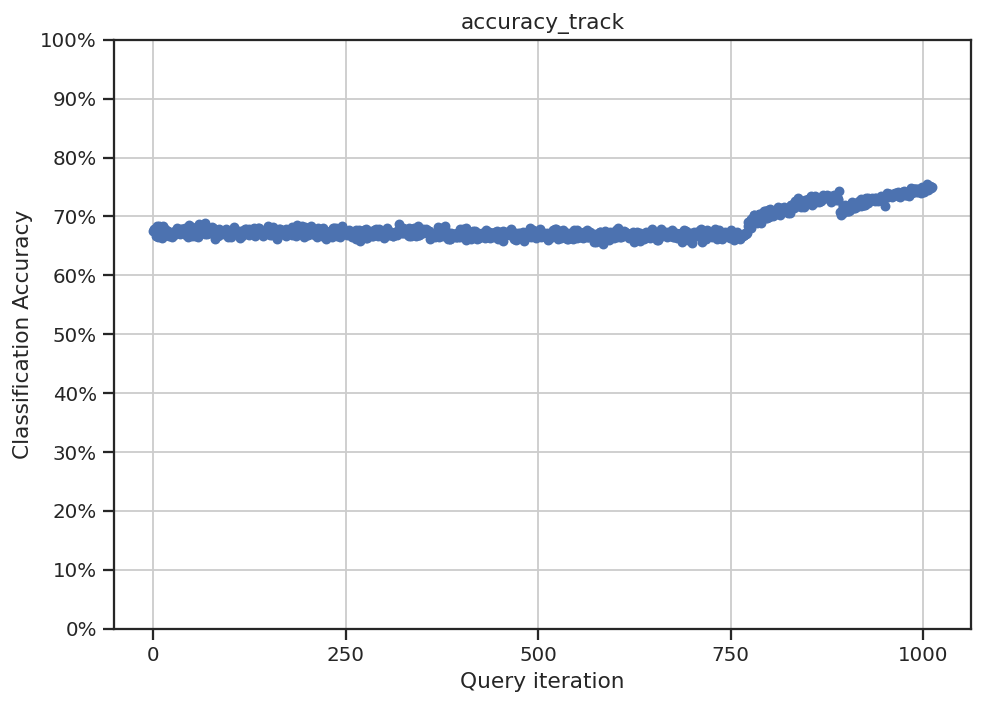

In [96]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_10)
ax.scatter(range(len(acc_10)), acc_10, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [97]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.margin_sampling, X_training = labelled_data, y_training = label)

In [98]:
queries = 220
acc_20 = []
for i in range(queries):
  query_idx, val = learner.query(pool2)
  learner.teach(
      X = pool2[query_idx].reshape(1,-1),
      y = orac2[query_idx].reshape(1,)
  )
  pool2 = np.delete(pool2, query_idx, axis = 0)
  orac2 = np.delete(orac2, query_idx)
  # look up for score
  acc_20.append(learner.score(X.to_numpy(),y.to_numpy()))

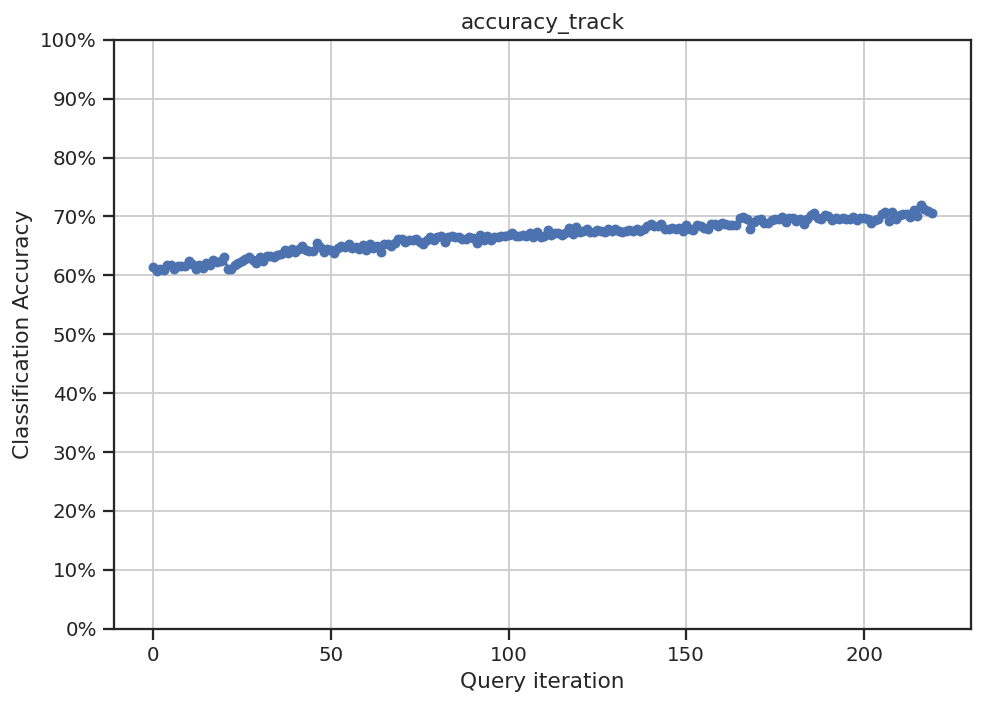

In [99]:
ig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_20)
ax.scatter(range(len(acc_20)), acc_20, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [100]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.margin_sampling, X_training = labelled_data, y_training = label)

In [101]:
queries = 350
acc_30 = []
for i in range(queries):
  query_idx, val = learner.query(pool3)
  learner.teach(
      X = pool3[query_idx].reshape(1,-1),
      y = orac3[query_idx].reshape(1,)
  )
  pool3 = np.delete(pool3, query_idx, axis = 0)
  orac3 = np.delete(orac3, query_idx)
  # look up for score
  acc_30.append(learner.score(X.to_numpy(),y.to_numpy()))

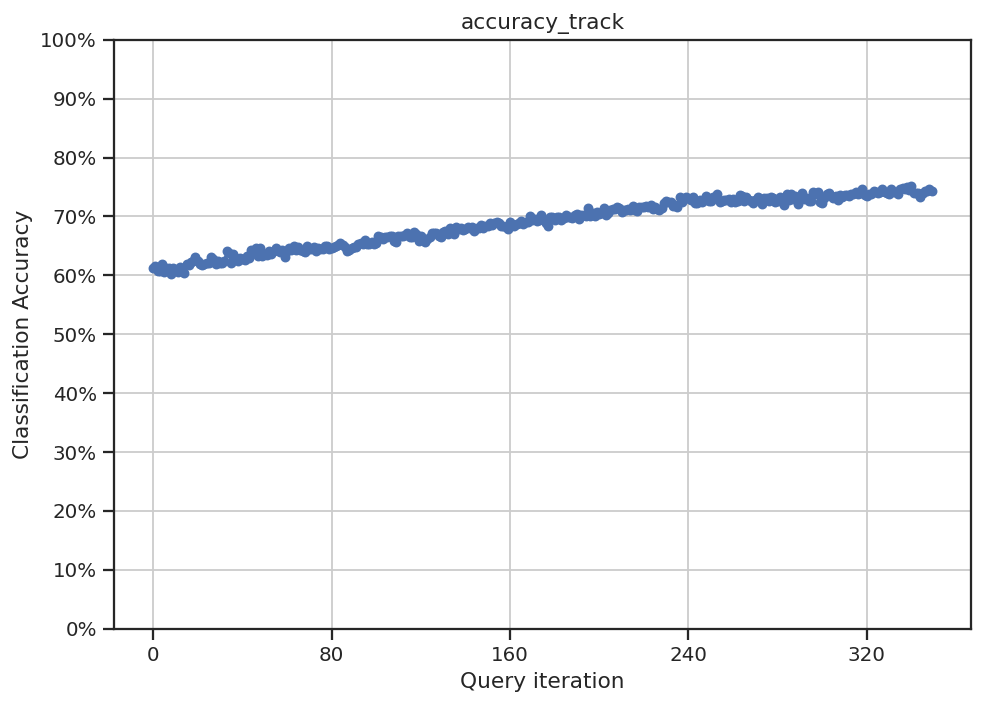

In [102]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_30)
ax.scatter(range(len(acc_30)), acc_30, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [103]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.margin_sampling, X_training = labelled_data, y_training = label)

In [104]:
queries = 500
acc_40 = []
for i in range(queries):
  query_idx, val = learner.query(pool4)
  learner.teach(
      X = pool4[query_idx].reshape(1,-1),
      y = orac4[query_idx].reshape(1,)
  )
  pool4 = np.delete(pool4, query_idx, axis = 0)
  orac4 = np.delete(orac4, query_idx)
  # look up for score
  acc_40.append(learner.score(X.to_numpy(),y.to_numpy()))

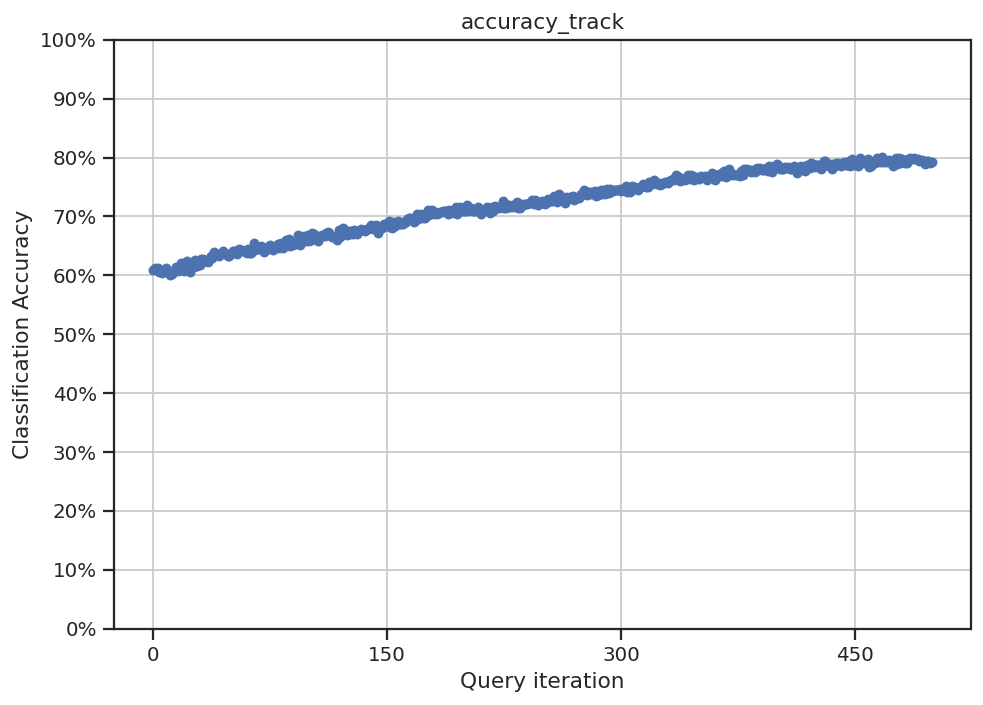

In [105]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_40)
ax.scatter(range(len(acc_40)), acc_40, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [106]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.entropy_sampling, X_training = labelled_data, y_training = label)

In [107]:
pool1,temp1,orac1,buf1 = train_test_split(unlabelled_data, oracle_ans, test_size = 0.9, random_state=2)
pool2,temp2,orac2,buf2 = train_test_split(temp1, buf1, test_size = 0.77, random_state=2)
pool3,pool4,orac3,orac4 = train_test_split(temp2, buf2, test_size = 0.56, random_state=2)

In [108]:
pool1 = pool1.to_numpy()
orac1 = orac1.to_numpy()
pool2 = pool2.to_numpy()
orac2 = orac2.to_numpy()
pool3 = pool3.to_numpy()
orac3 = orac3.to_numpy()
pool4 = pool4.to_numpy()
orac4 = orac4.to_numpy()

In [109]:
queries = 120
for i in range(queries):
  query_idx, val = learner.query(pool1)
  learner.teach(
      X = pool1[query_idx].reshape(1,-1),
      y = orac1[query_idx].reshape(1,)
  )
  pool1 = np.delete(pool1, query_idx, axis = 0)
  orac1 = np.delete(orac1, query_idx)
  # look up for score
  acc_10.append(learner.score(X.to_numpy(),y.to_numpy()))

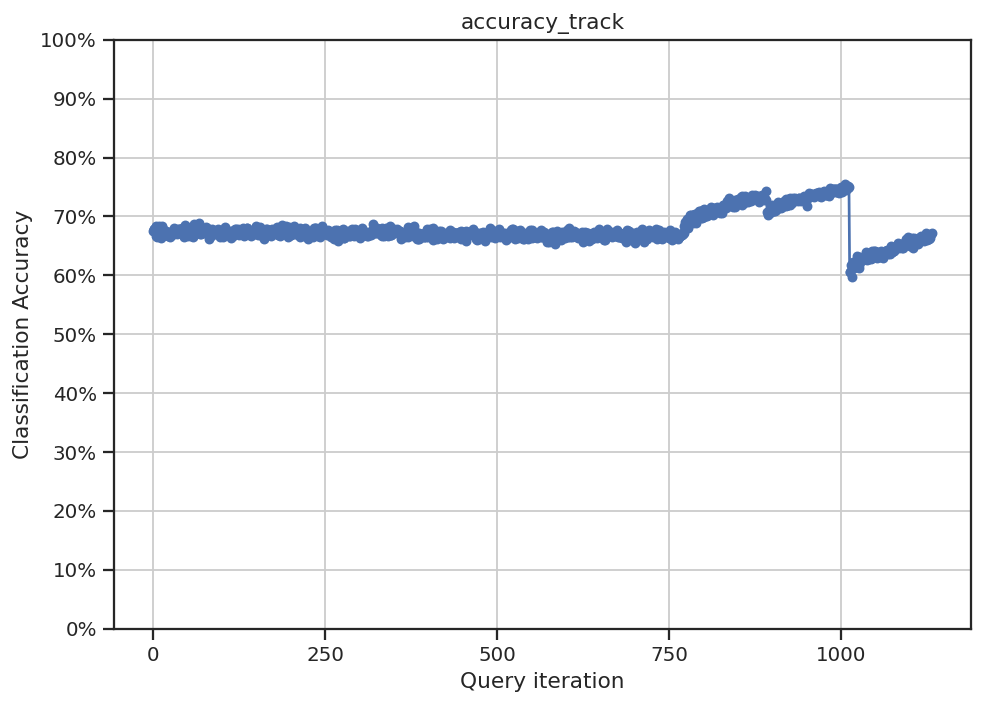

In [110]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_10)
ax.scatter(range(len(acc_10)), acc_10, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [112]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.entropy_sampling, X_training = labelled_data, y_training = label)

In [113]:
queries = 220
acc_20 = []
for i in range(queries):
  query_idx, val = learner.query(pool2)
  learner.teach(
      X = pool2[query_idx].reshape(1,-1),
      y = orac2[query_idx].reshape(1,)
  )
  pool2 = np.delete(pool2, query_idx, axis = 0)
  orac2 = np.delete(orac2, query_idx)
  # look up for score
  acc_20.append(learner.score(X.to_numpy(),y.to_numpy()))

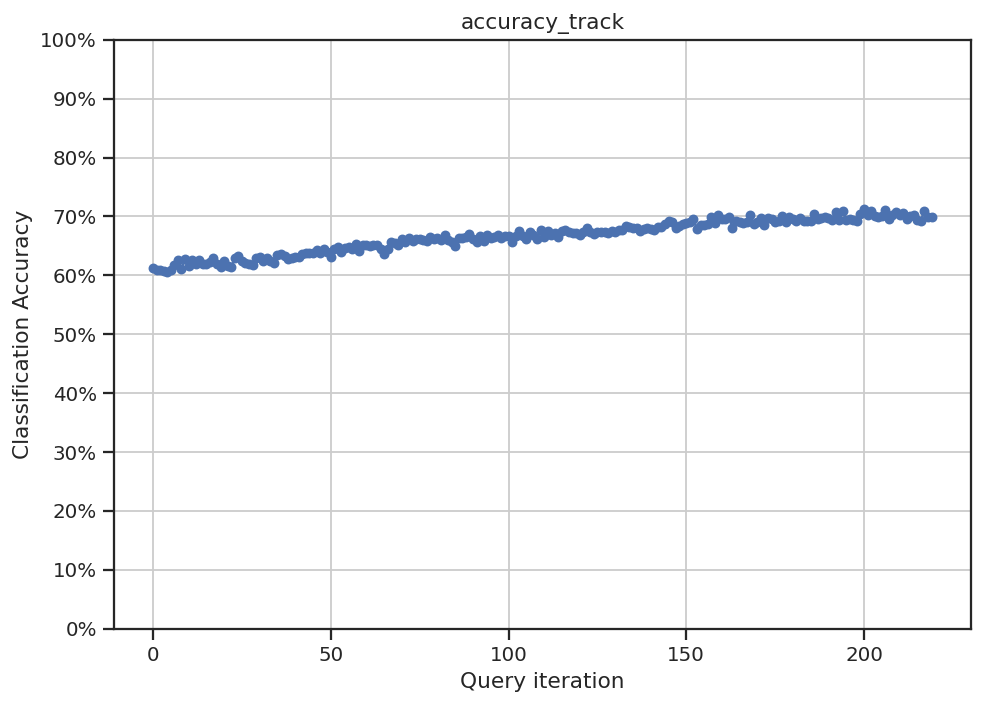

In [114]:
ig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_20)
ax.scatter(range(len(acc_20)), acc_20, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [115]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.entropy_sampling, X_training = labelled_data, y_training = label)

In [116]:
queries = 350
acc_30 = []
for i in range(queries):
  query_idx, val = learner.query(pool3)
  learner.teach(
      X = pool3[query_idx].reshape(1,-1),
      y = orac3[query_idx].reshape(1,)
  )
  pool3 = np.delete(pool3, query_idx, axis = 0)
  orac3 = np.delete(orac3, query_idx)
  # look up for score
  acc_30.append(learner.score(X.to_numpy(),y.to_numpy()))

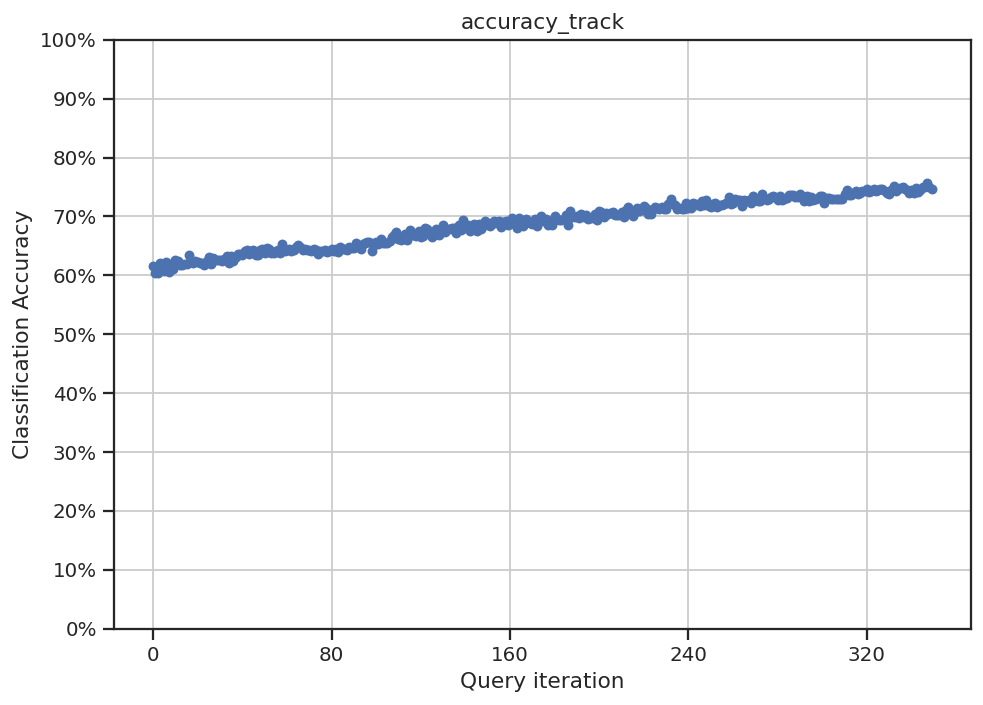

In [117]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_30)
ax.scatter(range(len(acc_30)), acc_30, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [118]:
learner = ActiveLearner(estimator = RandomForestClassifier(), query_strategy = uncertainty.entropy_sampling, X_training = labelled_data, y_training = label)

In [119]:
queries = 500
acc_40 = []
for i in range(queries):
  query_idx, val = learner.query(pool4)
  learner.teach(
      X = pool4[query_idx].reshape(1,-1),
      y = orac4[query_idx].reshape(1,)
  )
  pool4 = np.delete(pool4, query_idx, axis = 0)
  orac4 = np.delete(orac4, query_idx)
  # look up for score
  acc_40.append(learner.score(X.to_numpy(),y.to_numpy()))

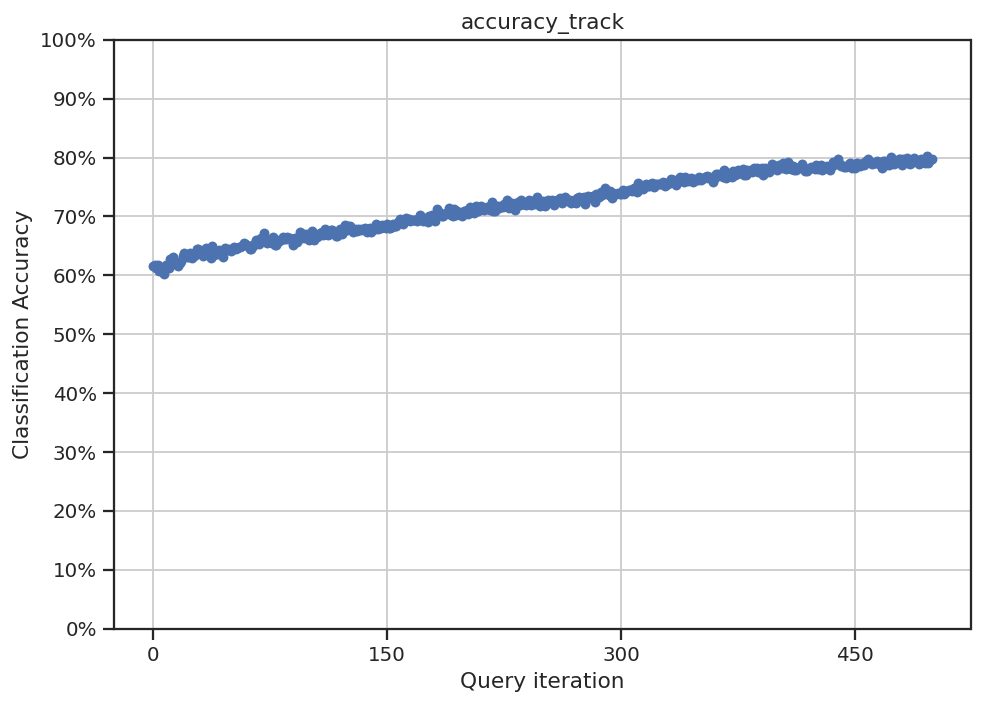

In [120]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(acc_40)
ax.scatter(range(len(acc_40)), acc_40, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [73]:
committee = Committee(learner_list = learner_list, query_strategy=vote_entropy_sampling)

In [74]:
ini_score = committee.score(X.to_numpy(),y.to_numpy())

In [72]:
noofmem = 5
learner_list = list()
split_percent = [0.88, 0.87, 0.85, 0.83]

lab_data, unlab_data,lab, oracle = train_test_split(X,y, test_size = 0.9, random_state = 2)
learner = ActiveLearner(estimator = RandomForestClassifier(), X_training= lab_data.to_numpy(), y_training= lab.to_numpy())
learner_list.append(learner)

for i in range(noofmem-1):
  learner = ActiveLearner(estimator = RandomForestClassifier(), X_training= lab_data.to_numpy(), y_training= lab.to_numpy())
  lab_data, unlab_data,lab, oracle = train_test_split(unlab_data,oracle, test_size = split_percent[i], random_state = 2)
  learner_list.append(learner)

In [75]:
noofq = 30
accuracy_track = [ini_score]
unlab_data = unlab_data.to_numpy()
oracle = oracle.to_numpy()
for i in range(noofq):
  query_idx, val = committee.query(unlab_data)
  committee.teach(
      X = unlab_data[query_idx].reshape(1,-1),
      y = oracle[query_idx].reshape(1,)
  )
  accuracy_track.append(committee.score(X.to_numpy(),y.to_numpy()))
  unlab_data = np.delete(unlab_data, query_idx, axis=0)
  oracle = np.delete(oracle, query_idx)

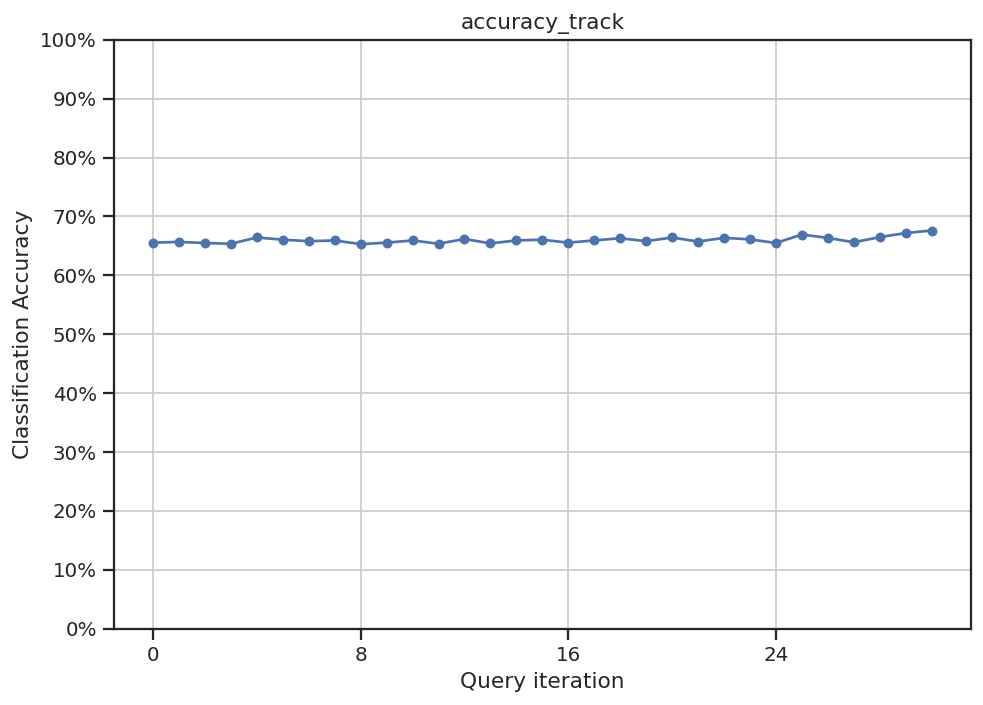

In [76]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(accuracy_track)
ax.scatter(range(len(accuracy_track)), accuracy_track, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [122]:
from modAL.disagreement import max_disagreement_sampling
committee = Committee(learner_list = learner_list, query_strategy=max_disagreement_sampling)

In [123]:
ini_score = committee.score(X.to_numpy(),y.to_numpy())

In [126]:
noofmem = 5
learner_list = list()
split_percent = [0.88, 0.87, 0.85, 0.83]

lab_data, unlab_data,lab, oracle = train_test_split(X,y, test_size = 0.9, random_state = 2)
learner = ActiveLearner(estimator = RandomForestClassifier(), X_training= lab_data.to_numpy(), y_training= lab.to_numpy())
learner_list.append(learner)

for i in range(noofmem-1):
  learner = ActiveLearner(estimator = RandomForestClassifier(), X_training= lab_data.to_numpy(), y_training= lab.to_numpy())
  lab_data, unlab_data,lab, oracle = train_test_split(unlab_data,oracle, test_size = split_percent[i], random_state = 2)
  learner_list.append(learner)

In [127]:
noofq = 30
accuracy_track = [ini_score]
unlab_data = unlab_data.to_numpy()
oracle = oracle.to_numpy()
for i in range(noofq):
  query_idx, val = committee.query(unlab_data)
  committee.teach(
      X = unlab_data[query_idx].reshape(1,-1),
      y = oracle[query_idx].reshape(1,)
  )
  accuracy_track.append(committee.score(X.to_numpy(),y.to_numpy()))
  unlab_data = np.delete(unlab_data, query_idx, axis=0)
  oracle = np.delete(oracle, query_idx)

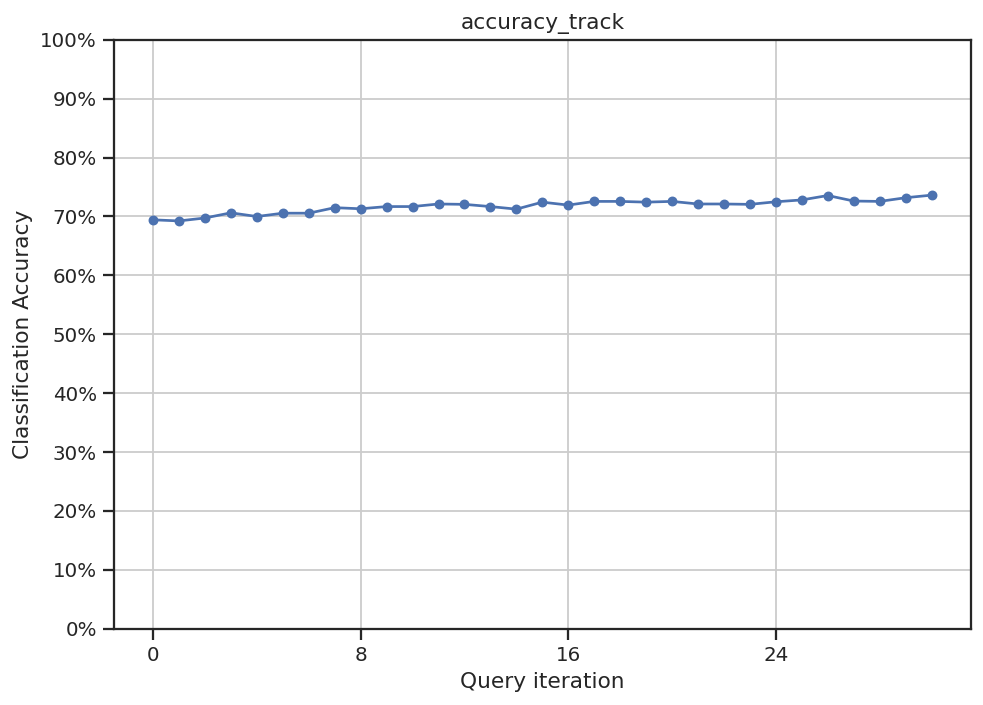

In [128]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(accuracy_track)
ax.scatter(range(len(accuracy_track)), accuracy_track, s=20)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('accuracy_track')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()